# Assignment-4 Deep Learning AI2100

## Name-Gunjit Mittal     Roll No.-AI21BTECH11011

In [97]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np
import torch

## Creating dataset

In [98]:
torch.manual_seed(7)
np.random.seed(1)
sample_size = 5500
def gen_sample():
    sample_length = np.random.randint(2,10)
    x1 = np.random.rand(sample_length)
    x2 = np.zeros(sample_length)
    x2[0:2] = 1
    np.random.shuffle(x2)
    x = np.vstack((x1, x2))
    y = x1@x2
    return x, y
X = np.empty(sample_size, dtype=object)
Y = np.empty(sample_size)
for i in range(sample_size):
    x, y = gen_sample()
    X[i] = x
    Y[i] = y
X = np.array(X)
Y = torch.tensor(Y)

## Elmon Network

In [99]:
class Elmon(torch.nn.Module):
    """ Elmon model for the task of summing up the product of two vectors """
    def __init__(self):
        super().__init__()
        self.h = (torch.zeros((4, 1), dtype=torch.double))
        self.u = torch.nn.Parameter(torch.randn((4, 2), dtype=torch.double))
        self.v = torch.nn.Parameter(torch.randn((1, 4), dtype=torch.double))
        self.w = torch.nn.Parameter(torch.randn((4, 4), dtype=torch.double))
        self.bx = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.by = torch.nn.Parameter(torch.zeros((1, 1), dtype=torch.double))
        self.double()
    
    def forward(self,input):
        H = self.h
        for i in range(input.shape[1]):
            x = input[:,i].reshape(2,1)
            H = torch.tanh(self.u@x + self.w@H + self.bx)
        return torch.relu(self.v@H+ self.by)

In [100]:
elmon = Elmon()
optimizer1 = torch.optim.SGD(elmon.parameters(), lr=0.01) # Stochastic Gradient Descent
criterion = torch.nn.MSELoss() # Mean Squared Error
n_epochs = 15 # Number of epochs
Elmon_loss = np.empty(n_epochs)

for epoch in range(1, n_epochs + 1):
    epoch_loss = 0
    for i in range(sample_size):
        optimizer1.zero_grad() # Clears existing gradients from previous epoch
        input = torch.tensor(X[i], dtype=torch.double)
        output = elmon(input)
        loss = criterion(output, Y[i].reshape(1,1)) # Calculates loss
        epoch_loss += loss.item()
        loss.backward() # Does backpropagation and calculates gradients
        optimizer1.step() # Updates the weights accordingly
    Elmon_loss[epoch-1] = epoch_loss/sample_size
    print('Epoch: {}/{}'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.4f}".format(epoch_loss/sample_size))

Epoch: 1/15 Loss: 0.2185
Epoch: 2/15 Loss: 0.1163
Epoch: 3/15 Loss: 0.1005
Epoch: 4/15 Loss: 0.0721
Epoch: 5/15 Loss: 0.0240
Epoch: 6/15 Loss: 0.0105
Epoch: 7/15 Loss: 0.0069
Epoch: 8/15 Loss: 0.0053
Epoch: 9/15 Loss: 0.0044
Epoch: 10/15 Loss: 0.0038
Epoch: 11/15 Loss: 0.0034
Epoch: 12/15 Loss: 0.0030
Epoch: 13/15 Loss: 0.0028
Epoch: 14/15 Loss: 0.0026
Epoch: 15/15 Loss: 0.0024


## Long Short Term Memory (LSTM)

In [101]:
class LSTM(torch.nn.Module):
    """ LSTM model for the task of summing up the product of two vectors """
    def __init__(self):
        super().__init__()
        self.h = (torch.zeros((4, 1), dtype=torch.double))
        self.c = (torch.zeros((4, 1), dtype=torch.double))
        self.v = torch.nn.Parameter(torch.randn((1, 4), dtype=torch.double))
        self.wf = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.wi = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.wc = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.wo = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.bi = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.bf = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.bc = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.bo = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.by = torch.nn.Parameter(torch.zeros((1, 1), dtype=torch.double))
        self.double()
    
    def forward(self, input):
        H = self.h.clone()
        C = self.c.clone()
        for i in range(input.shape[1]):
            x = input[:,i].reshape(2,1)
            sel_read = torch.sigmoid(self.wf@torch.cat((x,H),dim=0) + self.bf)
            sel_write = torch.sigmoid(self.wi@torch.cat((x,H),dim=0) + self.bi)
            c_temp = torch.tanh(self.wc@torch.cat((x,H),dim=0) + self.bc)
            C = sel_read*C + sel_write*c_temp
            sel_out = torch.sigmoid(self.wo@torch.cat((x,H),dim=0) + self.bo)
            H = sel_out*torch.tanh(C)
        return torch.relu(self.v@H+ self.by)
        

In [102]:
lstm = LSTM()
optimizer2 = torch.optim.SGD(lstm.parameters(), lr=0.01)
criterion2 = torch.nn.MSELoss()
LSTM_loss = np.empty(n_epochs)

for epoch in range(1, n_epochs + 1):
    epoch_loss = 0
    for i in range(sample_size):
        optimizer2.zero_grad() # Clears existing gradients from previous epoch
        input = torch.tensor(X[i], dtype=torch.double)
        output = lstm(input)
        loss2 = criterion2(output, Y[i].reshape(1,1)) # Calculates loss
        epoch_loss += loss2.item()
        loss2.backward() # Does backpropagation and calculates gradients
        optimizer2.step() # Updates the weights accordingly
    LSTM_loss[epoch-1] = epoch_loss/sample_size
    print('Epoch: {}/{}'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.4f}".format(epoch_loss/sample_size))

Epoch: 1/15 Loss: 0.0859
Epoch: 2/15 Loss: 0.0267
Epoch: 3/15 Loss: 0.0138
Epoch: 4/15 Loss: 0.0094
Epoch: 5/15 Loss: 0.0075
Epoch: 6/15 Loss: 0.0064
Epoch: 7/15 Loss: 0.0057
Epoch: 8/15 Loss: 0.0052
Epoch: 9/15 Loss: 0.0047
Epoch: 10/15 Loss: 0.0044
Epoch: 11/15 Loss: 0.0041
Epoch: 12/15 Loss: 0.0038
Epoch: 13/15 Loss: 0.0036
Epoch: 14/15 Loss: 0.0033
Epoch: 15/15 Loss: 0.0031


## Gated Reccurent Unit (GRU)

In [103]:
class GRU(torch.nn.Module):
    """ GRU model for the task of summing up the product of two vectors """
    def __init__(self):
        super().__init__()
        self.h = (torch.zeros((4, 1), dtype=torch.double))
        self.v = torch.nn.Parameter(torch.randn((1, 4), dtype=torch.double))
        self.wz = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.wr = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.wh = torch.nn.Parameter(torch.randn((4, 6), dtype=torch.double))
        self.bz = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.br = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.bh = torch.nn.Parameter(torch.zeros((4, 1), dtype=torch.double))
        self.by = torch.nn.Parameter(torch.zeros((1, 1), dtype=torch.double))
        self.double()
    
    def forward(self, input):
        H = self.h.clone()
        for i in range(input.shape[1]):
            x = input[:,i].reshape(2,1)
            z = torch.sigmoid(self.wz@torch.cat((x,H),dim=0) + self.bz)
            r = torch.sigmoid(self.wr@torch.cat((x,H),dim=0) + self.br)
            h_temp = torch.tanh(self.wh@torch.cat((x,r*H),dim=0) + self.bh)
            H = (1-z)*H + z*h_temp
        return torch.relu(self.v@H+ self.by)
        

In [104]:
gru = GRU()
optimizer3 = torch.optim.SGD(gru.parameters(), lr=0.01) # Stochastic Gradient Descent
criterion3 = torch.nn.MSELoss() # Mean Squared Error
GRU_loss = np.empty(n_epochs)
for epoch in range(1, n_epochs + 1):
    epoch_loss = 0
    for i in range(sample_size):
        optimizer3.zero_grad() # Clears existing gradients from previous epoch
        input = torch.tensor(X[i], dtype=torch.double)
        output = gru(input)
        loss3 = criterion3(output, Y[i].reshape(1,1)) # Calculates loss
        epoch_loss += loss3.item()
        loss3.backward() # Does backpropagation and calculates gradients
        # print(gru.wz)
        optimizer3.step() # Updates the weights accordingly
    GRU_loss[epoch-1] = epoch_loss/sample_size
    print('Epoch: {}/{}'.format(epoch, n_epochs), end=' ')
    print("Loss: {:.4f}".format(epoch_loss/sample_size))

Epoch: 1/15 Loss: 0.0667
Epoch: 2/15 Loss: 0.0144
Epoch: 3/15 Loss: 0.0085
Epoch: 4/15 Loss: 0.0058
Epoch: 5/15 Loss: 0.0043
Epoch: 6/15 Loss: 0.0033
Epoch: 7/15 Loss: 0.0026
Epoch: 8/15 Loss: 0.0021
Epoch: 9/15 Loss: 0.0017
Epoch: 10/15 Loss: 0.0015
Epoch: 11/15 Loss: 0.0013
Epoch: 12/15 Loss: 0.0012
Epoch: 13/15 Loss: 0.0011
Epoch: 14/15 Loss: 0.0010
Epoch: 15/15 Loss: 0.0009


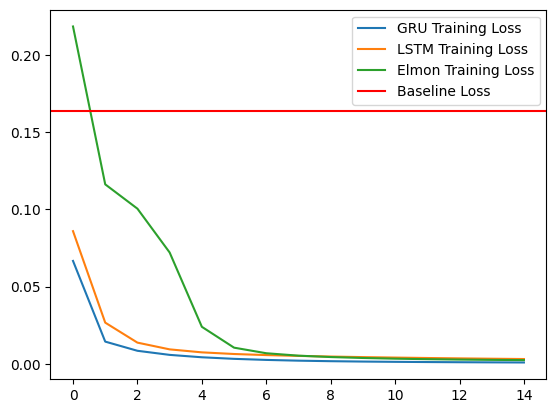

In [105]:
# Plotting the loss and comparing with baseline loss
base_line_loss = criterion3(torch.ones(sample_size), Y).item() # Baseline loss

plt.plot(GRU_loss, label='GRU Training Loss')
plt.plot(LSTM_loss, label='LSTM Training Loss')
plt.plot(Elmon_loss, label='Elmon Training Loss')
plt.axhline(y=base_line_loss, color='r', linestyle='-', label='Baseline Loss')
plt.legend()
plt.show()

## Creating test dataset

In [106]:
test_sample_size = 1000
test_X = np.empty(test_sample_size, dtype=object)
test_Y = np.empty(test_sample_size)
for i in range(test_sample_size):
    x, y = gen_sample()
    test_X[i] = x
    test_Y[i] = y
test_X = np.array(test_X)
test_Y = torch.tensor(test_Y)

## Comparing the Performace of the models

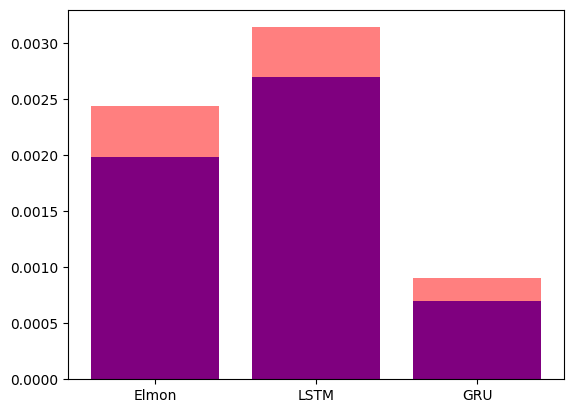

In [107]:
test_criterion = torch.nn.MSELoss() # Mean Squared Error

elmon_output = np.empty(test_sample_size) 
for i in range(test_sample_size):
    elmon_output[i] = elmon(torch.tensor(test_X[i]))
elmon_test_loss = test_criterion(torch.tensor(elmon_output), test_Y).item()

lstm_output = np.empty(test_sample_size)
for i in range(test_sample_size):
    lstm_output[i] = lstm(torch.tensor(test_X[i]))
lstm_test_loss = test_criterion(torch.tensor(lstm_output), test_Y).item()

gru_output = np.empty(test_sample_size)
for i in range(test_sample_size):
    gru_output[i] = gru(torch.tensor(test_X[i]))
gru_test_loss = test_criterion(torch.tensor(gru_output), test_Y).item()

plt.bar(['Elmon', 'LSTM', 'GRU'], [elmon_test_loss, lstm_test_loss, gru_test_loss], color='blue') # Plotting the test loss
plt.bar(['Elmon', 'LSTM', 'GRU'], [Elmon_loss[-1], LSTM_loss[-1], GRU_loss[-1]], alpha=0.5, color='red') # Plotting the training loss
plt.show()

The dark pink area is obtained by the intersection of training and test loss while the light pink area is the training loss. 